<a href="https://colab.research.google.com/github/marinasbrum/ExploringNonverbalCommunication/blob/main/Emotional_Responses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de Bibliotecas:

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura do arquivo CSV:

In [132]:
file_path = '/content/drive/My Drive/Portfólio/teste.csv'

teste = pd.read_csv(file_path)

Montando o gráfico das olhadas de Jim Halpert para a câmera por episódio em cada temporada:


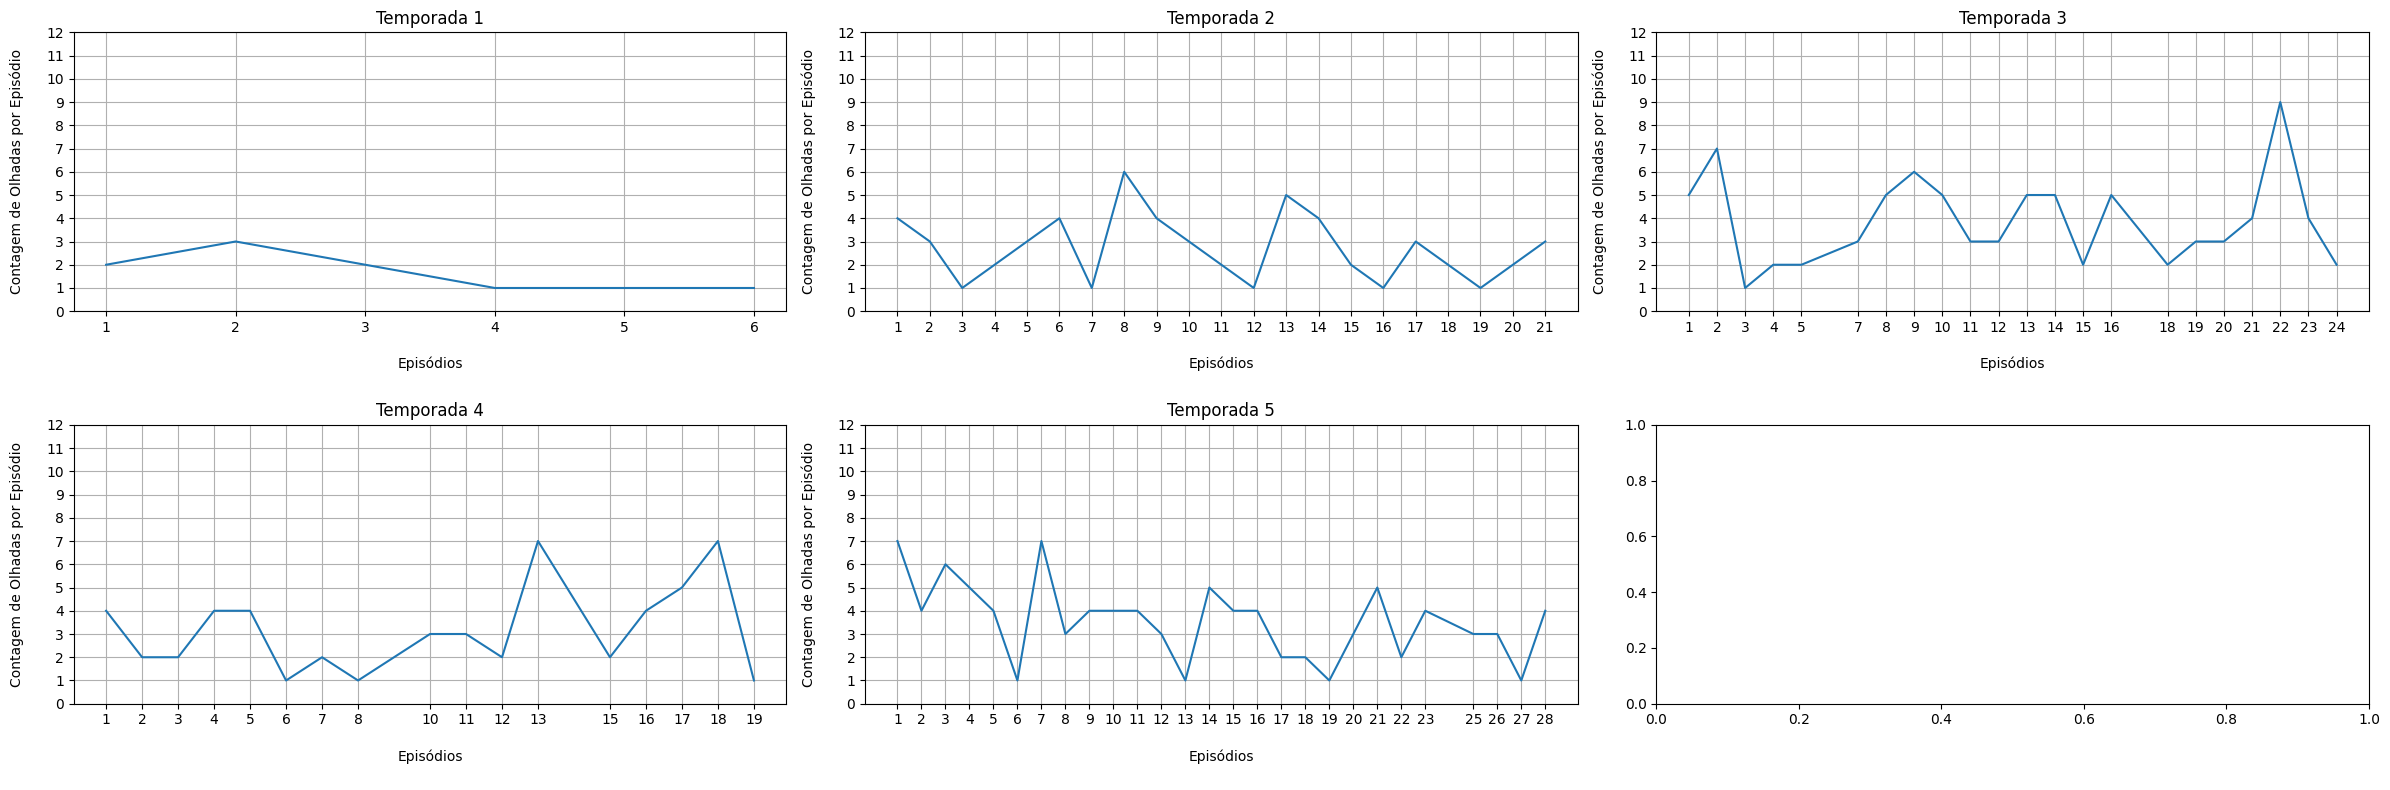

In [168]:
episodes_counts = teste.groupby(['Season', 'Episode']).size().reset_index(name='frq')
max_looks = 12
fig, axes = plt.subplots(nrows=(len(episodes_counts['Season'].unique()) + 2) // 3, ncols=3, figsize=(24, 8))

for idx, (season, season_data) in enumerate(episodes_counts.groupby('Season')):
    row_idx = idx // 3
    col_idx = idx % 3

    ax = axes[row_idx, col_idx]
    ax.plot(season_data['Episode'], season_data['frq'])
    ax.set_xticks(season_data['Episode'])
    ax.set_yticks(range(0, max_looks + 1))
    ax.set_title(f'Temporada {season}')
    ax.set_xlabel('\nEpisódios\n')
    ax.set_ylabel('Contagem de Olhadas por Episódio\n')
    ax.grid(True)

plt.tight_layout()
plt.show()